In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from matplotlib import rc 

rc('font', family='Malgun Gothic') 

Epoch [100/1000], Loss: 4.5343
Epoch [200/1000], Loss: 4.0197
Epoch [300/1000], Loss: 3.6746
Epoch [400/1000], Loss: 3.4015
Epoch [500/1000], Loss: 3.1849
Epoch [600/1000], Loss: 3.0130
Epoch [700/1000], Loss: 2.8765
Epoch [800/1000], Loss: 2.7680
Epoch [900/1000], Loss: 2.6817
Epoch [1000/1000], Loss: 2.6130


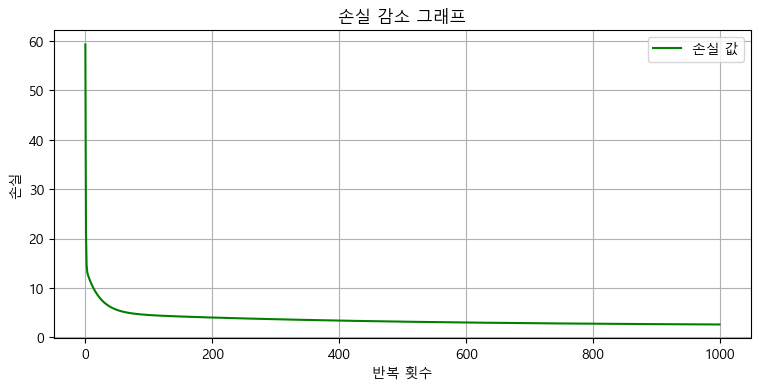

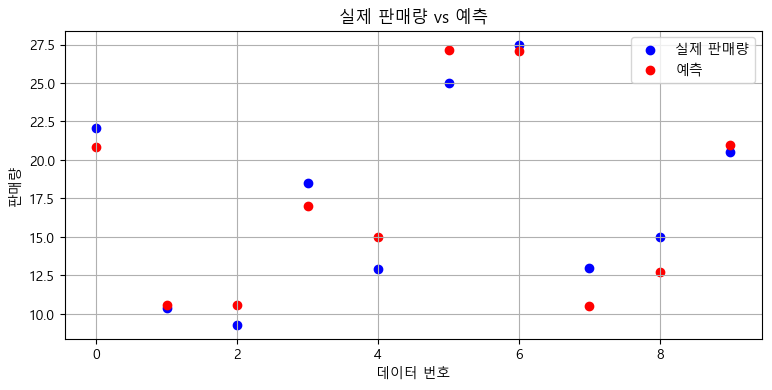

학습된 모델의 파라미터:
가중치: tensor([[0.2048, 0.3695, 0.0535]])
편향: tensor([-0.2132])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

x = torch.tensor([[50.0, 25.0, 30.0],
                  [10.0, 20.0, 25.0],
                  [5.0, 22.0, 30.0],
                  [30.0, 26.0, 28.0],
                  [40.0, 15.0, 28.0],
                  [60.0, 35.0, 40.0],
                  [70.0, 30.0, 35.0],
                  [20.0, 15.0, 20.0],
                  [25.0, 18.0, 22.0],
                  [45.0, 28.0, 30.0]], dtype=torch.float32)

y = torch.tensor([[22.1], [10.4], [9.3], [18.5], [12.9], 
                  [25.0], [27.5], [13.0], [15.0], [20.5]], dtype=torch.float32)

class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(3, 1)  

    def forward(self, x):
        return self.linear(x)

model = LogisticRegression()

loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()  # 기울기 초기화
    outputs = model(x)  # 순전파
    loss = loss_function(outputs, y)  # 손실 계산
    loss.backward()  # 역전파
    optimizer.step()  # 가중치 업데이트

    losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

plt.figure(figsize=(9, 4))
plt.plot(losses, label="손실 값", color="green")
plt.title("손실 감소 그래프")
plt.xlabel("반복 횟수")
plt.ylabel("손실")
plt.grid(True)  
plt.legend()
plt.show()

with torch.no_grad():
    predicted = model(x)
plt.figure(figsize=(9, 4))
plt.scatter(range(len(y)), y.numpy(), color='blue', label='실제 판매량')
plt.scatter(range(len(y)), model(x).detach().numpy(), color='red', label='예측') 
plt.title("실제 판매량 vs 예측")
plt.xlabel("데이터 번호")
plt.ylabel("판매량")
plt.legend()
plt.grid(True)  
plt.show()

print("학습된 모델의 파라미터:")
for name, param in model.named_parameters():
    if name == "linear.weight":
        print(f"{"가중치"}: {param.data}")
    elif name == "linear.bias":
        print(f"{"편향"}: {param.data}")


Epoch [100/1000], Loss: 0.5302
Epoch [200/1000], Loss: 0.3836
Epoch [300/1000], Loss: 0.3198
Epoch [400/1000], Loss: 0.2852
Epoch [500/1000], Loss: 0.2639
Epoch [600/1000], Loss: 0.2495
Epoch [700/1000], Loss: 0.2392
Epoch [800/1000], Loss: 0.2315
Epoch [900/1000], Loss: 0.2255
Epoch [1000/1000], Loss: 0.2208


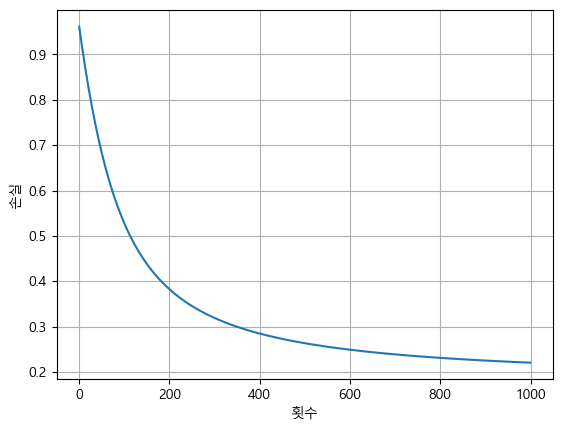

tensor([[ 1.4967,  0.8617],
        [ 1.6477,  2.5230],
        [ 0.7658,  0.7659],
        ...,
        [-0.6486,  0.0702],
        [-1.0265, -1.8819],
        [-1.1631, -1.7449]])
가중치 [[1.3976446 1.074304 ]]
편향 [-0.221575]


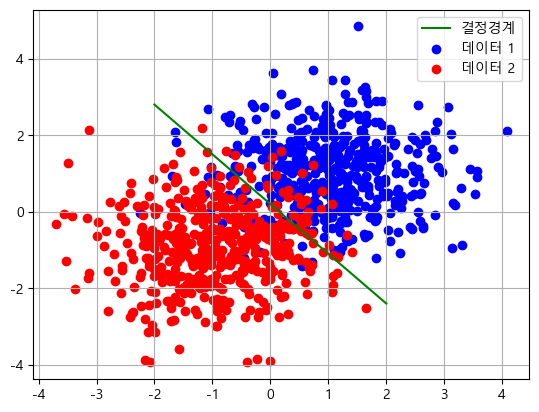

In [85]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc 

rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False 

# 1. 입출력 정의
np.random.seed(42)
num_samples = 1000

# 1-1. 데이터 생성 - 1
mean_1 = np.array([1.0, 1.0])
cov_1 = np.array([[1, 0], [0, 1]])
data_1 = np.random.multivariate_normal(mean_1, cov_1, num_samples // 2)

# 1-2. 데이터 생성 - 2
mean_2 = np.array([-1.0, -1.0])
cov_2 = np.array([[1, 0], [0, 1]])
data_2 = np.random.multivariate_normal(mean_2, cov_2, num_samples // 2)

# 1-3. 1-1 과 1-2 병합
data = np.vstack((data_1, data_2))
data = torch.from_numpy(data).float()
labels = np.ones(num_samples)
labels[num_samples // 2:] = 0
labels = torch.from_numpy(labels).float().view(-1, 1)
num_samples, num_features = data.shape

# 2. 모델 정의
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  

    def forward(self, x):
        out = self.linear(x)
        out = torch.sigmoid(out)
        return out

model = LogisticRegression(2, 1)

# 3. 손실 함수 정의
loss_fnc = nn.BCELoss()  
optimizer = optim.SGD(model.parameters(), lr=0.01)
epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()  # 기울기 초기화
    outputs = model(data)  # 순전파
    loss = loss_function(outputs, labels)  # 손실 계산
    loss.backward()  # 역전파
    optimizer.step()  # 가중치 업데이트
    losses.append(loss.data.numpy())  # 손실값 저장

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.data:.4f}')

# 4. 시각화
plt.plot(losses)
plt.xlabel('횟수')
plt.ylabel('손실')
plt.grid()
plt.show()
w = model.linear.weight.data.numpy()
b = model.linear.bias.data.numpy()
x_plot = np.array([-2, 2])
y_plot = (-b - w[0][0]*x_plot) / w[0][1]    
plt.plot(x_plot, y_plot, color='g', label='결정경계')
plt.scatter(data_1[:, 0], data_1[:, 1], color='b', label='데이터 1')
plt.scatter(data_2[:, 0], data_2[:, 1], color='r', label='데이터 2')
plt.grid()
plt.legend()

print("가중치", w)
print("편향", b)

[Epoch 1, Batch 100] Loss: 1.870
[Epoch 1, Batch 200] Loss: 1.158
[Epoch 1, Batch 300] Loss: 0.779
[Epoch 1, Batch 400] Loss: 0.621
[Epoch 1, Batch 500] Loss: 0.553
[Epoch 1, Batch 600] Loss: 0.506
[Epoch 1, Batch 700] Loss: 0.458
[Epoch 1, Batch 800] Loss: 0.451
[Epoch 1, Batch 900] Loss: 0.432
[Epoch 2, Batch 100] Loss: 0.391
[Epoch 2, Batch 200] Loss: 0.397
[Epoch 2, Batch 300] Loss: 0.404
[Epoch 2, Batch 400] Loss: 0.364
[Epoch 2, Batch 500] Loss: 0.369
[Epoch 2, Batch 600] Loss: 0.358
[Epoch 2, Batch 700] Loss: 0.340
[Epoch 2, Batch 800] Loss: 0.334
[Epoch 2, Batch 900] Loss: 0.337
[Epoch 3, Batch 100] Loss: 0.342
[Epoch 3, Batch 200] Loss: 0.350
[Epoch 3, Batch 300] Loss: 0.308
[Epoch 3, Batch 400] Loss: 0.314
[Epoch 3, Batch 500] Loss: 0.310
[Epoch 3, Batch 600] Loss: 0.330
[Epoch 3, Batch 700] Loss: 0.323
[Epoch 3, Batch 800] Loss: 0.294
[Epoch 3, Batch 900] Loss: 0.309
[Epoch 4, Batch 100] Loss: 0.302
[Epoch 4, Batch 200] Loss: 0.309
[Epoch 4, Batch 300] Loss: 0.310
[Epoch 4, 

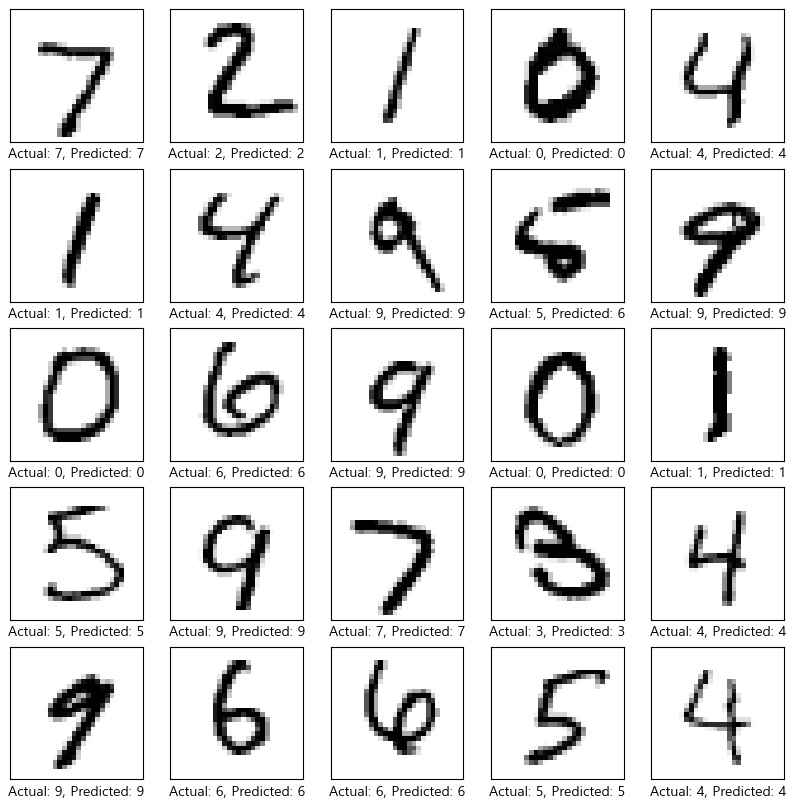

In [87]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# MNIST 데이터셋 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # 평균과 표준편차를 사용하여 정규화
])

# 학습 및 테스트 데이터 로드
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# 신경망 정의
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # 28 * 28 = 784 입력 => 128 은닉층 => 10 출력
        self.fc1 = nn.Linear(28 * 28, 128)  # 첫 번째 fully connected layer
        self.fc2 = nn.Linear(128, 10)       # 출력층

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # 이미지 펼치기
        x = torch.relu(self.fc1(x))  # 활성화 함수 ReLU
        x = self.fc2(x)             # 출력층 (Softmax는 나중에 추가)
        return x

# 모델 인스턴스화
model = SimpleNN()

# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()  # 분류 문제에서 자주 사용되는 손실 함수
optimizer = optim.SGD(model.parameters(), lr=0.01)  # SGD 옵티마이저 사용

# 학습
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 5  # 에포크 수

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # 기울기 초기화
        outputs = model(inputs)  # 모델 순전파
        loss = criterion(outputs, labels)  # 손실 계산
        loss.backward()  # 역전파
        optimizer.step()  # 가중치 업데이트

        running_loss += loss.item()
        if i % 100 == 99:  # 100번째 배치마다 출력
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 100:.3f}")
            running_loss = 0.0

print("Finished Training")

# 모델 저장
torch.save(model.state_dict(), 'mnist_simple_nn.pth')

# 학습 완료 후 테스트 데이터로 예측 수행
model.eval()
test_images, test_labels = next(iter(testloader))
test_images, test_labels = test_images.to(device), test_labels.to(device)

with torch.no_grad():
    test_outputs = model(test_images)
softmax = nn.Softmax(dim=1)
probabilities = softmax(test_outputs)
predicted_classes = torch.argmax(probabilities, dim=1)

# 이미지 및 예측 시각화
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].cpu().numpy().squeeze(), cmap=plt.cm.binary)
    plt.xlabel(f'Actual: {test_labels[i].item()}, Predicted: {predicted_classes[i].item()}')
plt.show()


In [90]:
%pip install torch torchvision

  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached fsspec-2024.12.0-py3-none-any.whl.metadata (11 kB)
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
Using cached fsspec-2024.12.0-py3-none-any.whl (183 kB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.3
    Uninstalling sympy-1.13.3:
      Successfully uninstalled sympy-1.13.3
Note: you may need to restart the kernel to use updated packages.


## FashionMNIST 신경망

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = "cuda" if torch.cuda.is_available() else "cpu"
# print(device)

# 1. 데이터 입출력 정의
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

# 2. 모델 정의
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
      nn.Linear(28*28, 512), # 입력층
      nn.BatchNorm1d(512), 
      nn.ReLU(),
      nn.Linear(512, 256), # Layer 1
      nn.BatchNorm1d(256), 
      nn.ReLU(),
      nn.Linear(256, 64), # Layer 2
      nn.BatchNorm1d(64), 
      nn.ReLU(),
      nn.Linear(64, 10), # 출력층
    ) # [0.2, 2.1, 1.5, 0.4, ......]

  def forward(self, x):
    out = self.flatten(x)
    out = self.linear_relu_stack(out)
    return out

model = NeuralNetwork()
model.to(device) # GPU적용

# 3. 손실함수 정의
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10

def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    X = X.to(device)
    y = y.to(device)
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss = loss.item()
      current = batch * len(X)
      print(f"loss: {loss: .4f}, [{current} / {size}]")

def test_loop(dataloader, model, loss_fn):
  test_size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for X, y in dataloader:
      X = X.to(device)
      y = y.to(device)
      outputs = model(X)
      test_loss += loss_fn(outputs, y).item()
      correct += (outputs.argmax(1) == y).type(torch.float).sum().item()
  
  test_loss /= num_batches
  correct /= test_size
  print(f"Accuracy: {100*correct: .1f}, Avg loss: {test_loss}")


for epoch in range(epochs):
  print(f"Epoch: {epoch+1}----------------------")
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)
print("Complete!")




Epoch: 1----------------------
loss:  2.4390, [0 / 60000]
loss:  0.5338, [6400 / 60000]
loss:  0.4015, [12800 / 60000]
loss:  0.4957, [19200 / 60000]
loss:  0.4419, [25600 / 60000]
loss:  0.3940, [32000 / 60000]
loss:  0.2955, [38400 / 60000]
loss:  0.4714, [44800 / 60000]
loss:  0.4212, [51200 / 60000]
loss:  0.4256, [57600 / 60000]
Accuracy:  84.7, Avg loss: 0.4118616973898213
Epoch: 2----------------------
loss:  0.3694, [0 / 60000]
loss:  0.3313, [6400 / 60000]
loss:  0.2519, [12800 / 60000]
loss:  0.3247, [19200 / 60000]
loss:  0.3414, [25600 / 60000]
loss:  0.2917, [32000 / 60000]
loss:  0.2443, [38400 / 60000]
loss:  0.3549, [44800 / 60000]
loss:  0.3246, [51200 / 60000]
loss:  0.3680, [57600 / 60000]
Accuracy:  85.9, Avg loss: 0.3819887639990278
Epoch: 3----------------------
loss:  0.2434, [0 / 60000]
loss:  0.2831, [6400 / 60000]
loss:  0.2125, [12800 / 60000]
loss:  0.2606, [19200 / 60000]
loss:  0.3034, [25600 / 60000]
loss:  0.2830, [32000 / 60000]
loss:  0.2040, [38400 / 

NameError: name 'np' is not defined

<Figure size 1500x1500 with 0 Axes>

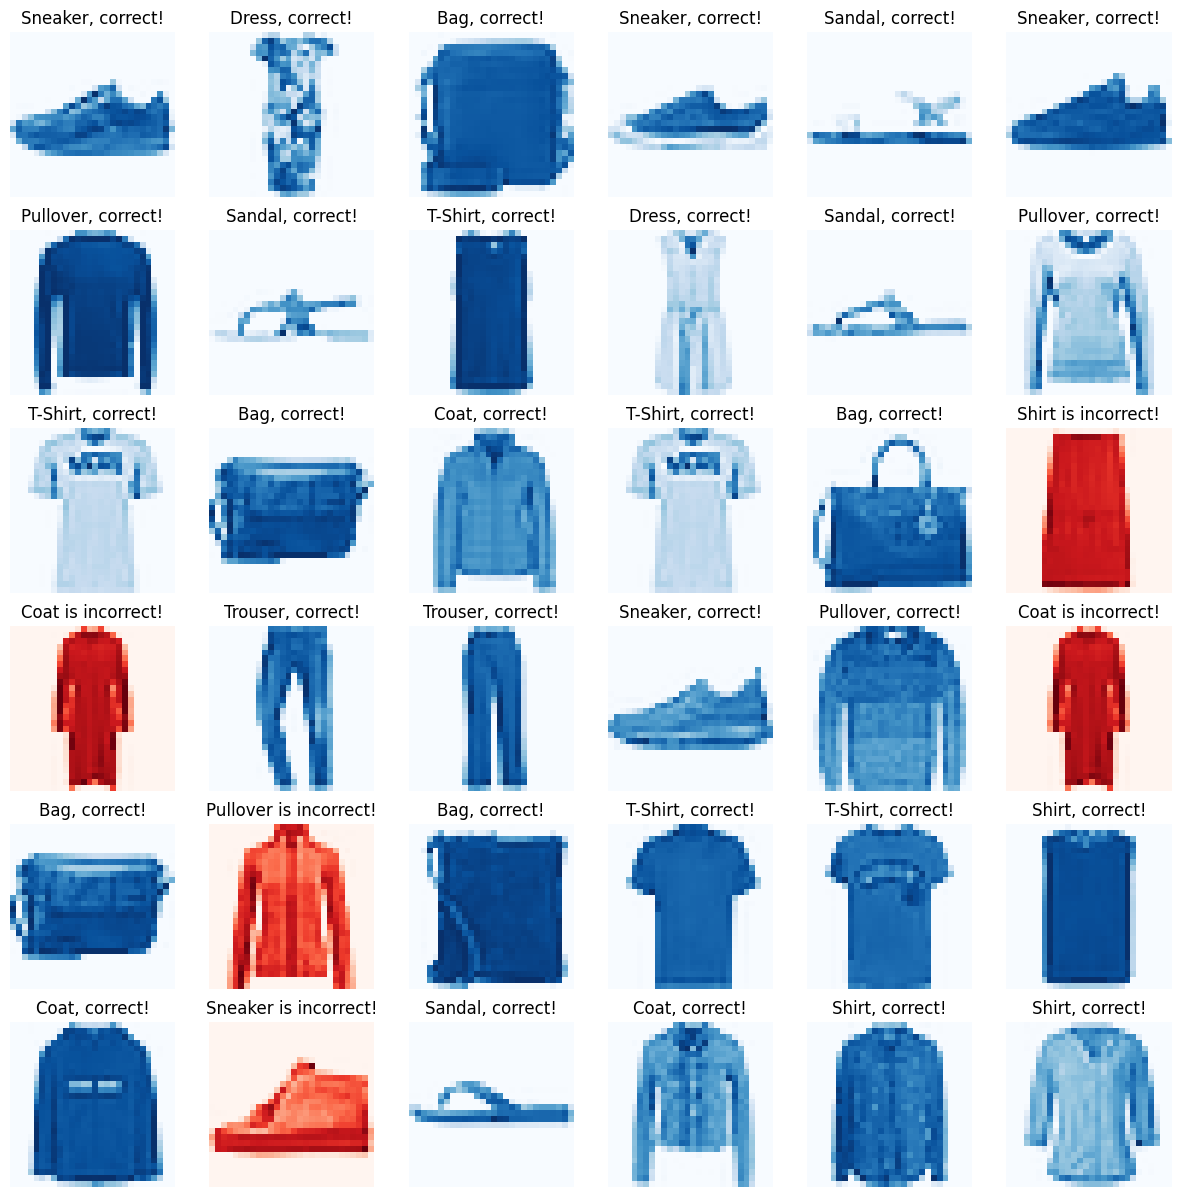

In [22]:
import numpy as np
label_tags = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

columns = 6
rows = 6
fig = plt.figure(figsize = (15, 15))
model.eval()

for i in range(1, columns * rows + 1):
  data_idx = np.random.randint(len(test_dataloader))
  input_img = test_data[data_idx][0].to(device)
  label = test_data[data_idx][1]

  with torch.no_grad():
    output = model(input_img)
    _, prediction = torch.max(output, 1)
    pred_class = label_tags[prediction.item()]
    true_class = label_tags[label]

  title = f"{pred_class}, correct!" if pred_class == true_class else f"{pred_class} is incorrect!"
  cmap = 'Blues' if pred_class == true_class else "Reds"

  fig.add_subplot(rows, columns, i)
  plot_img = input_img.squeeze().cpu().numpy()
  plt.imshow(plot_img, cmap = cmap)
  plt.title(title)
  plt.axis("off")

plt.show()